# How can we predict the price of an apartment?

## Previously on ...

### Airbnb Dataset

Les dades amb les quals treballarem en aquesta sessió són dades reals recopilades per *Airbnb*.
Aquestes analitzen la informació disponible sobre els llistats d'Airbnb d'una ciutat, proporcionant filtres i mètriques clau perquè pugueu veure com Airbnb s'utilitza per competir amb el mercat d'habitatges residencials.

Amb aquestes dades podríeu fer preguntes fonamentals sobre Airbnb a qualsevol barri o a tota la ciutat. Preguntes com:

- "Quants lloguers hi ha al meu barri i on són?"
- "Quantes cases i apartaments es lloguen amb freqüència a turistes i no a residents a llarg termini?"
- "Quant més costen els hotels respecte a un apartament, pels turistes (compareu-ho amb els lloguers a llarg termini)?"
- "Quins amfitrions tenen una empresa amb diversos llistats i on?"

El dataset inclou informació com:
- Quantitat de nits que es lloga un habitatge a l'any.
- Estades mínimes.
- Quantes habitacions es lloguen en un edifici.
- Nombre d'ocupats permesos en un lloguer.

En el nostre cas, **volem predir el preu dels habitatges utilitzant el resum donat.**

### Linear regression

A estadística, la **regressió lineal** és un mètode per modelar la relació entre una resposta escalar (o variable dependent) i una o més variables explicatives (o variables independents).

A regressió lineal, les relacions es modelen mitjançant funcions lineals on els paràmetres del model s’estimen a partir de les dades. 

Aquests models s'anomenen models lineals. 

Suposem que treballem amb un conjunt de dades $ \{y_{i}, x_{i_1}, \ldots, x_{i_m} \}_{i = 1}^{n}$ de $n$ unitats. 

Un **model de regressió lineal** assumeix que la relació entre la variable dependent $y$ i el vector $p$ dels regressors $x$ és lineal. 
Així, el model pren la forma:
$${\displaystyle y_{i}=\beta _{0}+\beta _{1}x_{i_1}+\cdots +\beta _{p}x_{i_p},\qquad i=1,\ldots ,n,}$$

No es permet l'ús de cap llibreria o funció que no estigui ja importat, sigui aquí o més abaix en el notebook.

Cas simple: **Donat un conjunt de punts (X, Y) 2D, podem trobar la recta que minimitza la distància entre aquesta i tots els punts?**

Recordatori: 

Per tal de definir una recta necesitem dos punts $(x_0, y_0)$ i $(x_1, y_1)$. A partir d'aquests dos punts podem definir la recta com:

$$y={\frac {y_{1}-y_{0}}{x_{1}-x_{0}}} (x-x_{0}) +y_{0} = m \cdot x + n$$

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('data/clean_scraping.csv', index_col = 'Unnamed: 0')

In [3]:
df.head()

id                                             name  host_id  \
0  18666                          Flat with Sunny Terrace    71615   
1  18674  Huge flat for 8 people close to Sagrada Familia    71615   
2  19157              Great Place in Sagrada Familia, Bcn    73099   
3  20345              2 Double rooms for 4 persons, WI-FI    76809   
4  21974               Comf. double room/private bathroom    73163   

          host_name neighbourhood_group                  neighbourhood  \
0  Mireia And Maria          Sant Martí     el Camp de l'Arpa del Clot   
1  Mireia And Maria            Eixample             la Sagrada Família   
2            Urania            Eixample             la Sagrada Família   
3              Mila          Nou Barris  Vilapicina i la Torre Llobeta   
4            Andres        Ciutat Vella                 el Barri Gòtic   

    latitude  longitude        room_type  price  minimum_nights  \
0  41.408886   2.185545  Entire home/apt    130               3   
1  41.404197   2.173058  Entire home/apt    110               1   
2  41.407929   2.174540     Private room     30               2   
3  41.429497   2.181558     Private room     25               2   
4  41.380768   2.175510     Private room     60               3   

   number_of_reviews last_review  reviews_per_month  \
0                  1  2015-10-10               0.03   
1                  4  2016-06-20               0.07   
2                160  2018-05-18               1.68   
3                 71  2018-05-03               0.73   
4                  2  2017-11-06               0.15   

   calculated_host_listings_count  availability_365  
0                              29                61  
1                              29               148  
2                               2                69  
3                               1               335  
4                               2                 0

In [4]:
df.shape

(23626, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

A la variable *y_true* guardarem la variable que volem predir amb el nostre model lineal.

In [6]:
y_true = df.price

Definim ara quina és la informació que utilitzarem per fer la predicció.
Com hem vist abans, algunes variables no són numèriques, per tant cal fer una conversió de la informació.

In [7]:
X = df[['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [8]:
cleanup_columns = { 'neighbourhood_group': { name: idx for idx, name in enumerate(X.neighbourhood_group.unique())},
                    'neighbourhood': { name: idx for idx, name in enumerate(X.neighbourhood.unique())},
                    'room_type': { name: idx for idx, name in enumerate(X.room_type.unique())},
                  }

In [9]:
X = X.replace(cleanup_columns)

No ens oblidem de normalitzar les dades abans de passar-les a LinearRegression!

In [10]:
X = (X - X.mean(0)) / X.std(0)

Un cop netejades les dades, separarem un conjunt de les dades. 
Veurem el perquè a la pròxima entrega.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y_true, train_size=0.8, random_state=0)

In [12]:
X_train.shape, X_test.shape

((18900, 10), (4726, 10))

En l'entrega que esteu fent, heu implementat una regressió lineal.
En aquest cas agafarem una llibreria que ja té implementat aquest model.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Definim el model
model = LinearRegression()

# Optimizem els parametres donant les dades i els preus dels lloguers
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Com accedir als valors de m i n de la regressió
model.coef_, model.intercept_

(array([ -7.88536369,  -4.36256106,  -1.63426283,  -2.92778196,
        -35.064274  , -10.06416817,  -7.08870897,   1.2220187 ,
         32.53109097,  10.62667793]),
 93.68041538440299)

In [16]:
# Predir un preu donat un conjunt de dades
y_pred = model.predict(X_test)

In [17]:
# Calculem l'error produït pel sistema
np.mean(np.abs(Y_test - y_pred))

53.91109644941224

Visualitzem l'error per un subconjunt de les dades:

Mean error: 53.91


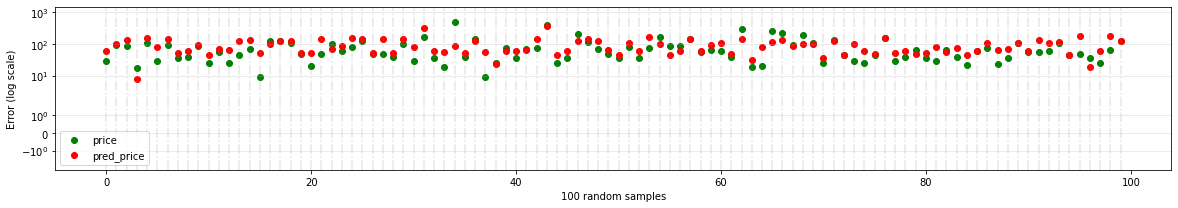

In [18]:
# Mostrem únicament 100 dades en el gràfic
size = 100
sample = np.random.choice(X_test.shape[0], size=size, replace=False)

# Mínima i màxima Y a mostrar en el gràfic

miny = np.minimum(y_pred[sample].min(), Y_test.values[sample].min()) - 10
maxy = np.maximum(y_pred[sample].max(), Y_test.values[sample].max()) + 1e3

# Visualització de les dades originals i les prediccions
plt.figure(figsize=(20, 3))
plt.scatter(range(size), Y_test.values[sample], color='green', label = 'price')
plt.scatter(range(size), y_pred[sample], color='red', label = 'pred_price')
plt.xlabel('100 random samples')
plt.ylabel('Error (log scale)')
plt.yscale('symlog')
plt.ylim([miny, maxy])
plt.grid(axis='y', which='minor', alpha=0.2)
plt.grid(axis='y', which='major', alpha=0.3)
plt.legend()

for x in range(size):
    plt.plot((x, x), (miny, maxy), '-.', color='gray', alpha=0.2)

print('Mean error: {:.2f}'.format(np.mean(np.abs(Y_test - y_pred))))

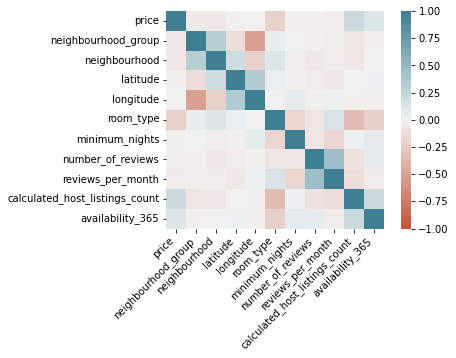

In [19]:
import seaborn as sns

corr = pd.concat([y_true, X], axis = 1).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Impacte de les dimensions del vector de característiques sobre una regressió lineal

Explorem com l'ús de més o menys informació impacta sobre el model.

És possible obtenir un millor model amb menys dades?

In [20]:
X_train.shape

(18900, 10)

In [21]:
import itertools

In [22]:
results = {}

for num_columns in range(1, X_train.shape[1]):
    for columns in tqdm(itertools.combinations(X.columns.tolist(), num_columns)):
        
        model = LinearRegression(normalize = True)
        model = model.fit(X_train[list(columns)], Y_train)

        y_pred = model.predict(X_test[list(columns)])
        
        results[columns] = np.mean(np.abs(Y_test - y_pred))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [23]:
list({k: v for k, v in sorted(results.items(), key=lambda item: item[1])}.items())[:5]

[(('neighbourhood_group',
   'latitude',
   'room_type',
   'minimum_nights',
   'reviews_per_month',
   'calculated_host_listings_count'),
  53.48915729220333),
 (('neighbourhood_group',
   'neighbourhood',
   'latitude',
   'room_type',
   'minimum_nights',
   'reviews_per_month',
   'calculated_host_listings_count'),
  53.511670973281916),
 (('neighbourhood_group',
   'latitude',
   'longitude',
   'room_type',
   'minimum_nights',
   'reviews_per_month',
   'calculated_host_listings_count'),
  53.534004677996876),
 (('neighbourhood_group',
   'neighbourhood',
   'room_type',
   'minimum_nights',
   'reviews_per_month',
   'calculated_host_listings_count'),
  53.5423630496031),
 (('neighbourhood_group',
   'room_type',
   'minimum_nights',
   'reviews_per_month',
   'calculated_host_listings_count'),
  53.54531204415784)]